In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import wfdb.processing
from astropy.timeseries import LombScargle
import antropy as ant
import os
import glob

import warnings 
warnings.filterwarnings('ignore')

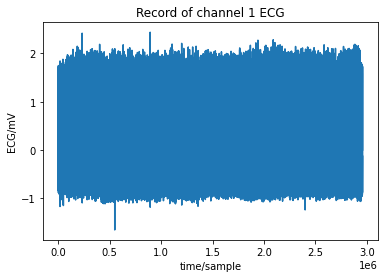

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 2957000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [5827],
 'block_size': [0]}

In [2]:
record = wfdb.rdrecord(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\a01",physical=True) 
wfdb.plot_wfdb(record, title='Record of channel 1 ECG') 
display(record.__dict__)

In [3]:
dict1=record.__dict__
dict1['p_signal']

array([[-0.06 ],
       [-0.065],
       [-0.06 ],
       ...,
       [ 0.   ],
       [ 0.   ],
       [ 0.   ]])

In [4]:
sig,fields = wfdb.rdsamp(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\a01") # rdsamp() returns the signal as a numpy array  
record=np.asarray(sig)
record

array([[-0.06 ],
       [-0.065],
       [-0.06 ],
       ...,
       [ 0.   ],
       [ 0.   ],
       [ 0.   ]])

In [5]:
fields

{'fs': 100,
 'sig_len': 2957000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG'],
 'comments': []}

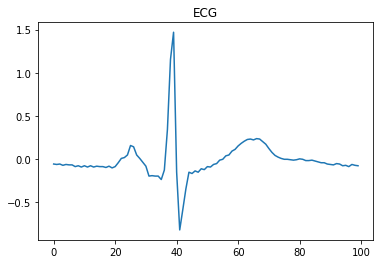

In [6]:
plt.plot(record[:100])
plt.title('ECG')
plt.show()

In [7]:
annts = wfdb.rdann(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\a01",extension='apn')# rdann() returns the annotations of a file.
annts.__dict__

{'record_name': 'a01',
 'extension': 'apn',
 'sample': array([      0,    6000,   12000,   18000,   24000,   30000,   36000,
          42000,   48000,   54000,   60000,   66000,   72000,   78000,
          84000,   90000,   96000,  102000,  108000,  114000,  120000,
         126000,  132000,  138000,  144000,  150000,  156000,  162000,
         168000,  174000,  180000,  186000,  192000,  198000,  204000,
         210000,  216000,  222000,  228000,  234000,  240000,  246000,
         252000,  258000,  264000,  270000,  276000,  282000,  288000,
         294000,  300000,  306000,  312000,  318000,  324000,  330000,
         336000,  342000,  348000,  354000,  360000,  366000,  372000,
         378000,  384000,  390000,  396000,  402000,  408000,  414000,
         420000,  426000,  432000,  438000,  444000,  450000,  456000,
         462000,  468000,  474000,  480000,  486000,  492000,  498000,
         504000,  510000,  516000,  522000,  528000,  534000,  540000,
         546000,  55200

In [8]:
annts_qrs = wfdb.rdann(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\qrsdata\a01",extension='qrs')# rdann() returns the annotations of a file.
annts_qrs.__dict__

{'record_name': 'a01',
 'extension': 'qrs',
 'sample': array([     34,     123,     207, ..., 2956283, 2956363, 2956445]),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',

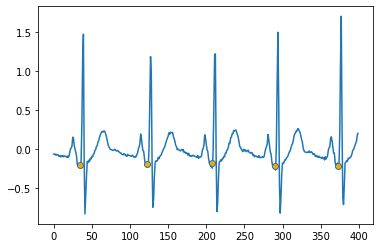

In [9]:
l=annts_qrs.__dict__['sample'][:5]
sig,fields = wfdb.rdsamp(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\a01") # rdsamp() returns the signal as a numpy array  
record=np.asarray(sig)
plt.plot(record[:400],markevery=l,marker='o',markerfacecolor='orange')

In [10]:
df=pd.read_csv(r"C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\datas\Book1.1.csv")
df['bmi']=''
df['Labels']=''

In [11]:
for i in df.index:
    df['bmi'][i] = (df['weight'][i]/pow(df['height'][i], 2)) * 10000

In [12]:
for i in df.index:
    if (df['AHI'][i] >= 30):
        df['Labels'][i]='Severe'
    elif ((df['AHI'][i] >= 15) and (df['AHI'][i] < 30)):
        df['Labels'][i]='Moderate'
    elif ((df['AHI'][i] >= 5) and (df['AHI'][i] < 15)):
        df['Labels'][i]='Mild'
    else:
        df['Labels'][i]='None'

In [13]:
df['Labels'].value_counts()

Severe      31
None        23
Moderate    11
Mild         5
Name: Labels, dtype: int64

In [14]:
df

,Record,Length,non-apn,apnea,hours,AI,HI,AHI,Age,Sex,height,weight,bmi,Labels
0,a01,490,20,470,9,12.50,57.1,69.60,51,M,175,102,33.3061,Severe
1,a02,529,109,420,9,57.20,12.3,69.50,38,M,180,120,37.037,Severe
2,a03,520,274,246,9,38.40,0.7,39.10,54,M,168,80,28.3447,Severe
3,a04,493,40,453,9,73.40,4.0,77.40,52,M,173,121,40.429,Severe
4,a05,455,179,276,8,35.00,6.0,41.00,58,M,176,78,25.1808,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.80,6.7,93.50,29,F,183,100,29.8606,Severe
66,x32,539,114,425,9,63.30,8.5,71.80,29,F,183,100,29.8606,Severe
67,x33,474,471,3,0,0.13,0.0,0.13,28,F,169,57,19.9573,None
68,x34,476,472,4,0,0.38,0.0,0.38,30,F,168,56,19.8413,None


In [15]:
df['Sex'].value_counts()

M    57
F    13
Name: Sex, dtype: int64

In [16]:
# pd.set_option('display.max_rows',None)
def time_domain_analysis(r_r,r_peak):                 #fn to calculate time measures, where r_r---> R-R interval, r_peak---> indexes of r_peak
        
    heart_rate=np.array([60*fs*1/r_r])                 #heart rate of each RR intervals
    avg_heart_rate=np.mean(heart_rate)               #average value of heart rate
    mean_abs_deviation_hr=np.mean(abs(heart_rate-avg_heart_rate))   #mean of absolute deviation of heart rate 
    SDNN=np.std(r_r)                                   #std of series of RR intervals
    SDSD=np.std(np.diff(r_r))                          #std of successive differences of adjacent rr-intervals
    RMSSD=np.sqrt(np.mean((np.diff(r_r))**2))          #square root of the mean squared differences of consecutive RR intervals
    NN50=np.count_nonzero(np.diff(r_r)>(50*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 50 ms
    #here our sampling rate is 100 samples per sec. So for 1 sample we have 10 ms. For 50 ms we have 5 samples
    pNN50=NN50/len(r_r)                                #proportion of RR intervals differing by more than 50 ms
    NN20=np.count_nonzero(np.diff(r_r)>(20*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 20 ms
    pNN20=NN20/len(r_r)                                #proportion of RR intervals differing by more than 20 ms
    #pNN20 for elderly healthy subjects versus younger patients with CHF 
    NN12=np.count_nonzero(np.diff(r_r)>(12*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 12 ms
    pNN12=NN12/len(r_r)                                #proportion of RR intervals differing by more than 20 ms
    #pNN12 for the normal versus CHF groups

    #creating a dictionary
    features={}                                       #empty dictionary to store time measures
    features['heart_rate_avg']=avg_heart_rate
    features['MAD_heart_rate']=mean_abs_deviation_hr
    features['SDNN']=SDNN
    features['SDSD']=SDSD
    features['RMSSD']=RMSSD
    features['NN50']=NN50
    features['pNN50']=pNN50
    features['NN20']=NN20
    features['pNN20']=pNN20
    features['NN12']=NN12
    features['pNN12']=pNN12

    return features

def frequency_domain_analysis(r_r):                         #fn to calculate frequency measures, where r_r---> R-R interval

    sample_times=np.array(range(len(r_r)))                  #time as sample numbers
    frequency, power = LombScargle(sample_times, r_r).autopower()

    #conditions for various bands
    cond_ulf = (frequency >= 0) & (frequency <= 0.003)      # - Ultra Low Frequency (ULF): 0-0.003
    cond_vlf = (frequency >= 0.003) & (frequency <= 0.04)   # - Very Low Frequency (VLF): 0.003-0.04Hz 
    cond_lf = (frequency >= 0.04) & (frequency <= 0.15)     # - Low Frequency (LF): 0.04-0.15Hz
    cond_hf = (frequency >= 0.15) & (frequency < 0.4)       # - High Frequency (HF): 0.15-0.4Hz

    #integral power by trapezoidal rule
    ulf = np.trapz(power[cond_ulf], frequency[cond_ulf])
    vlf = np.trapz(power[cond_vlf], frequency[cond_vlf])
    lf = np.trapz(power[cond_lf], frequency[cond_lf])
    hf = np.trapz(power[cond_hf], frequency[cond_hf])
    total_power= ulf + vlf + lf + hf
    lf_hf_ratio= lf/hf

    #creating a dictionary 
    features={}                                            #empty dictionary to store frequency measures
    features['ULF_Power'] = ulf
    features['VLF_Power'] = vlf
    features['LF_Power'] = lf
    features['HF_Power'] = hf
    features['Total_Power'] = total_power
    features['Ratio_LF/HF'] = lf_hf_ratio

    return features

def non_linear_domain_analysis(r_r):                     #fn to calculate non-linear measures, where r_r---> R-R interval

    #Poincaré analysis
    x_1 = r_r[:-1]                             #list of all intervals excluding the last interval
    x_2 = r_r[1:]                              #list of all intervals excluding the first interval  
    sd1 = np.sqrt(0.5) * np.std(x_2 - x_1)     #linear scaling of measures of short-term HRV
    sd2 = np.sqrt(0.5) * np.std(x_2 + x_1)     #linear scaling of measures of long-term HRV
    sd1_sd2_ratio = sd1/sd2 

    #detrended fluctuation analysis
    alpha = ant.detrended_fluctuation(r_r)      # scaling exponent a, the slope of the line relating log F(n) to log n.

    #entropy is the measure of the degree of irregularity or disorder within the signal
    #sample entropy analysis
    sample_en = ant.sample_entropy(r_r)

    #approximate entropy analysis
    App_en = ant.app_entropy(r_r)

    #creating a dictionary
    features={}                               #empty dictionary to store the non-linear measures
    features['SD1'] = sd1
    features['SD2'] = sd2
    features['SD1_SD2_ratio'] = sd1_sd2_ratio
    features['Alpha_DFA'] = alpha
    features['Sample_En'] = sample_en
    features['Approximate_En'] = App_en

    return features    

def satistical_domain_analysis(r_r):             #fn to calculate statistical measures, where r_r---> R-R interval

    mean = np.mean(r_r)
    std = np.std(r_r)
    skewness = scipy.stats.skew(r_r)
    kurtosis = scipy.stats.kurtosis(r_r)

    #creating a dictionary
    features={}                                  #empty dictionary to store the statistical features
    features['Mean'] = mean
    features['Standard_dev'] = std
    features['Skewness'] = skewness
    features['Kurtosis'] = kurtosis

    return features

In [17]:
path = r'C:\Users\giris\OneDrive\Desktop\mine\3sem\phase2\sadhana\sleep apnea\qrsdata\*.qrs'
annt_files= glob.glob(path)                  #Get list of all .qrs files in the current folder

In [18]:
df_features=pd.DataFrame(columns=['heart_rate_avg','MAD_heart_rate','SDNN','SDSD','RMSSD','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Standard_dev','Skewness','Kurtosis'])


In [19]:
fs=100                            #Sampling Frequency specified in the database - 100 Samples per second


for k in range(len(annt_files)):
    recordname=annt_files[k][:-4]
    
    annts_qrs = wfdb.rdann(recordname,extension='qrs')# rdann() returns the annotations of a file.
    
    r_peak_locs=annts_qrs.__dict__['sample']

    rr_interval=np.diff(r_peak_locs)                               #calculates the difference of successive peaks

    time_measures=time_domain_analysis(rr_interval,r_peak_locs)
    frequency_measures=frequency_domain_analysis(rr_interval)
    non_linear_measures=non_linear_domain_analysis(rr_interval)
    statistical_measures=satistical_domain_analysis(rr_interval)

    attributes={}                                            #empty dictionary to store all the features
    attributes.update(time_measures)
    attributes.update(frequency_measures)
    attributes.update(non_linear_measures)
    attributes.update(statistical_measures)

    ds=pd.DataFrame(attributes,index=[0,],columns=['heart_rate_avg','MAD_heart_rate','SDNN','SDSD','RMSSD','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Standard_dev','Skewness','Kurtosis'])
    df_features=df_features.append(ds,ignore_index=True)


In [20]:
df_features

,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,RMSSD,NN50,pNN50,NN20,pNN20,NN12,...,SD1,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis
0,62.452731,8.629194,15.952788,7.851999,7.851999,5272,0.176103,9191,0.307011,10966,...,5.552202,21.866879,0.253909,0.785016,1.059829,1.248814,98.754418,15.952788,0.044903,-0.153375
1,75.297989,11.711872,51.312997,57.361801,57.361801,3849,0.109219,5877,0.166766,8235,...,40.560918,60.174727,0.674052,0.793014,0.180764,0.543214,90.281490,51.312997,4.791455,38.966698
2,67.343716,8.426380,15.454264,8.617399,8.617399,2224,0.064919,6695,0.195429,10574,...,6.093421,20.987123,0.290341,0.936691,0.417592,0.748218,91.498949,15.454264,1.066024,3.219849
3,64.056484,6.771733,11.903092,5.609250,5.609250,1217,0.038954,5391,0.172556,8808,...,3.966339,16.359470,0.242449,0.834568,0.717745,0.889714,95.353402,11.903092,-0.292567,1.856877
4,64.103843,4.578290,8.768581,4.263427,4.263427,1181,0.041040,5481,0.190465,8503,...,3.014698,12.028768,0.250624,0.934391,1.206626,1.344618,94.499635,8.768581,0.124451,17.586790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,63.603951,10.724402,17.375703,9.476538,9.476538,6618,0.193679,10029,0.293503,11683,...,6.700924,23.641186,0.283443,0.775422,1.033398,1.299598,97.777700,17.375703,-0.182561,2.762937
66,65.655975,10.163937,16.380207,9.003307,9.003307,6472,0.189700,10075,0.295307,11765,...,6.366299,22.273332,0.285826,0.882136,1.037138,1.301712,94.498051,16.380207,-0.217948,-0.711709
67,72.984682,5.191501,8.825564,7.776647,7.776647,1018,0.029846,4751,0.139293,8367,...,5.498920,11.204716,0.490768,0.874394,1.008385,1.177741,83.087457,8.825564,3.563564,65.070375
68,73.022049,5.217140,8.842475,7.777747,7.777747,1028,0.030014,4782,0.139616,8407,...,5.499697,11.230849,0.489696,0.874313,1.009234,1.179144,83.053867,8.842475,3.516013,64.432115


In [21]:
# # creating final dataframe 
df=df.join(df_features)

# #dropping irrelevant columns
df.drop(columns=['non-apn','apnea','hours','AI','HI','height','weight'], inplace=True) 

#re-indexing the columns
df = df.reindex(columns=['Record','Length', 'AHI', 'Age', 'Sex', 'bmi', 'heart_rate_avg',
       'MAD_heart_rate', 'SDNN', 'SDSD', 'RMSSD', 'NN50', 'pNN50', 'NN20',
       'pNN20', 'NN12', 'pNN12', 'ULF_Power', 'VLF_Power', 'LF_Power',
       'HF_Power', 'Total_Power', 'Ratio_LF/HF', 'SD1', 'SD2', 'SD1_SD2_ratio',
       'Alpha_DFA', 'Sample_En', 'Approximate_En', 'Mean', 'Standard_dev',
       'Skewness', 'Kurtosis', 'Labels'])

# mapping categorical variables into numericals
replace_dict={'Sex' : {'M' : 0, 'F' : 1},
             'Labels' : {'None' : 0,  'Mild' : 1, 'Moderate' : 2, 'Severe' : 3}}

df.replace(replace_dict, inplace=True)

In [22]:
df

,Record,Length,AHI,Age,Sex,bmi,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,Labels
0,a01,490,69.60,51,0,33.3061,62.452731,8.629194,15.952788,7.851999,...,21.866879,0.253909,0.785016,1.059829,1.248814,98.754418,15.952788,0.044903,-0.153375,3
1,a02,529,69.50,38,0,37.037,75.297989,11.711872,51.312997,57.361801,...,60.174727,0.674052,0.793014,0.180764,0.543214,90.281490,51.312997,4.791455,38.966698,3
2,a03,520,39.10,54,0,28.3447,67.343716,8.426380,15.454264,8.617399,...,20.987123,0.290341,0.936691,0.417592,0.748218,91.498949,15.454264,1.066024,3.219849,3
3,a04,493,77.40,52,0,40.429,64.056484,6.771733,11.903092,5.609250,...,16.359470,0.242449,0.834568,0.717745,0.889714,95.353402,11.903092,-0.292567,1.856877,3
4,a05,455,41.00,58,0,25.1808,64.103843,4.578290,8.768581,4.263427,...,12.028768,0.250624,0.934391,1.206626,1.344618,94.499635,8.768581,0.124451,17.586790,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,93.50,29,1,29.8606,63.603951,10.724402,17.375703,9.476538,...,23.641186,0.283443,0.775422,1.033398,1.299598,97.777700,17.375703,-0.182561,2.762937,3
66,x32,539,71.80,29,1,29.8606,65.655975,10.163937,16.380207,9.003307,...,22.273332,0.285826,0.882136,1.037138,1.301712,94.498051,16.380207,-0.217948,-0.711709,3
67,x33,474,0.13,28,1,19.9573,72.984682,5.191501,8.825564,7.776647,...,11.204716,0.490768,0.874394,1.008385,1.177741,83.087457,8.825564,3.563564,65.070375,0
68,x34,476,0.38,30,1,19.8413,73.022049,5.217140,8.842475,7.777747,...,11.230849,0.489696,0.874313,1.009234,1.179144,83.053867,8.842475,3.516013,64.432115,0


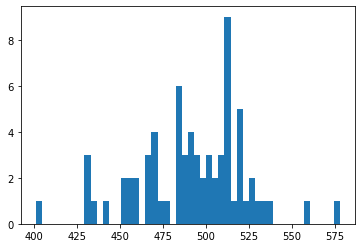

In [23]:
T = df["Length"]
E = df["Labels"]
plt.hist(T, bins = 50)
plt.show()

In [24]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='timeline'>

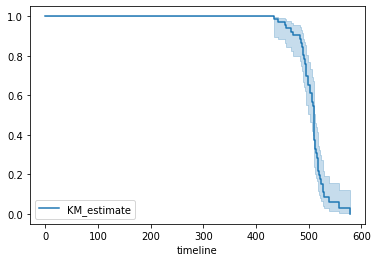

In [25]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

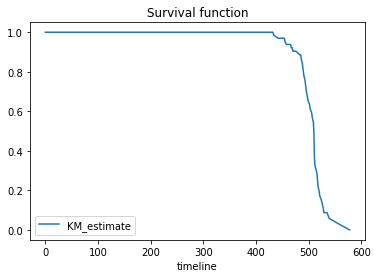

In [26]:
kmf.survival_function_.plot()
plt.title('Survival function')

In [27]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

511.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   502.0                   512.0


In [28]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

511.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   502.0                   512.0


Text(0.5, 1.0, 'Survival of different gender group')

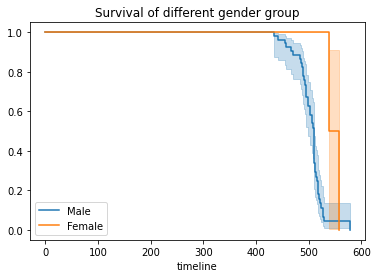

In [29]:
ax = plt.subplot(111)
m = (df["Sex"] == 0)
kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax)
plt.title("Survival of different gender group")

In [30]:
#checking the columns of the dataframe
df.columns

Index(['Record', 'Length', 'AHI', 'Age', 'Sex', 'bmi', 'heart_rate_avg',
       'MAD_heart_rate', 'SDNN', 'SDSD', 'RMSSD', 'NN50', 'pNN50', 'NN20',
       'pNN20', 'NN12', 'pNN12', 'ULF_Power', 'VLF_Power', 'LF_Power',
       'HF_Power', 'Total_Power', 'Ratio_LF/HF', 'SD1', 'SD2', 'SD1_SD2_ratio',
       'Alpha_DFA', 'Sample_En', 'Approximate_En', 'Mean', 'Standard_dev',
       'Skewness', 'Kurtosis', 'Labels'],
      dtype='object')

In [31]:
#saving the features to a csv file
df.to_csv('Features2.csv')

In [32]:
df=pd.read_csv('Features2.csv', index_col=0)

In [33]:
#summary statistics
df.describe()

,Length,AHI,Age,Sex,bmi,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,RMSSD,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,Labels
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,491.828571,28.047571,45.142857,0.185714,28.013456,68.183392,6.939374,50.022519,64.132379,64.132388,...,52.883587,0.578681,0.773349,0.586646,0.739608,92.151542,50.022519,40.598629,5787.777886,1.714286
std,31.576441,27.537779,10.837784,0.391684,6.481346,7.939541,3.792465,61.385717,88.293440,88.293457,...,60.489650,0.305916,0.179504,0.424124,0.476158,11.733206,61.385717,61.112813,9867.518644,1.331261
min,401.000000,0.000000,27.000000,0.000000,19.198960,50.651931,2.625269,4.625240,2.121998,2.121998,...,6.216301,0.139756,0.339686,0.002803,0.009381,71.386265,4.625240,-1.698286,-0.711709,0.000000
25%,470.250000,0.130000,38.000000,0.000000,21.950224,62.493960,4.634276,8.829792,5.559501,5.559501,...,11.821706,0.291983,0.672806,0.186612,0.314884,83.364583,8.829792,0.133452,11.229479,0.000000
50%,496.000000,21.000000,44.000000,0.000000,27.440599,67.556274,6.169692,16.089736,9.416626,9.416626,...,20.596234,0.490232,0.832236,0.672419,0.863744,91.319369,16.089736,3.539788,56.164867,2.000000
75%,511.000000,42.750000,53.750000,0.000000,33.172600,73.206163,7.851495,77.196089,100.556102,100.556102,...,83.274288,0.862119,0.885050,0.997697,1.158777,98.622194,77.196089,90.486612,9313.998028,3.000000
max,578.000000,93.500000,63.000000,1.000000,45.328720,85.489966,25.453387,241.763399,341.362617,341.362618,...,242.111005,1.012510,1.101473,1.407482,1.585581,124.124450,241.763399,185.910736,34834.688364,3.000000


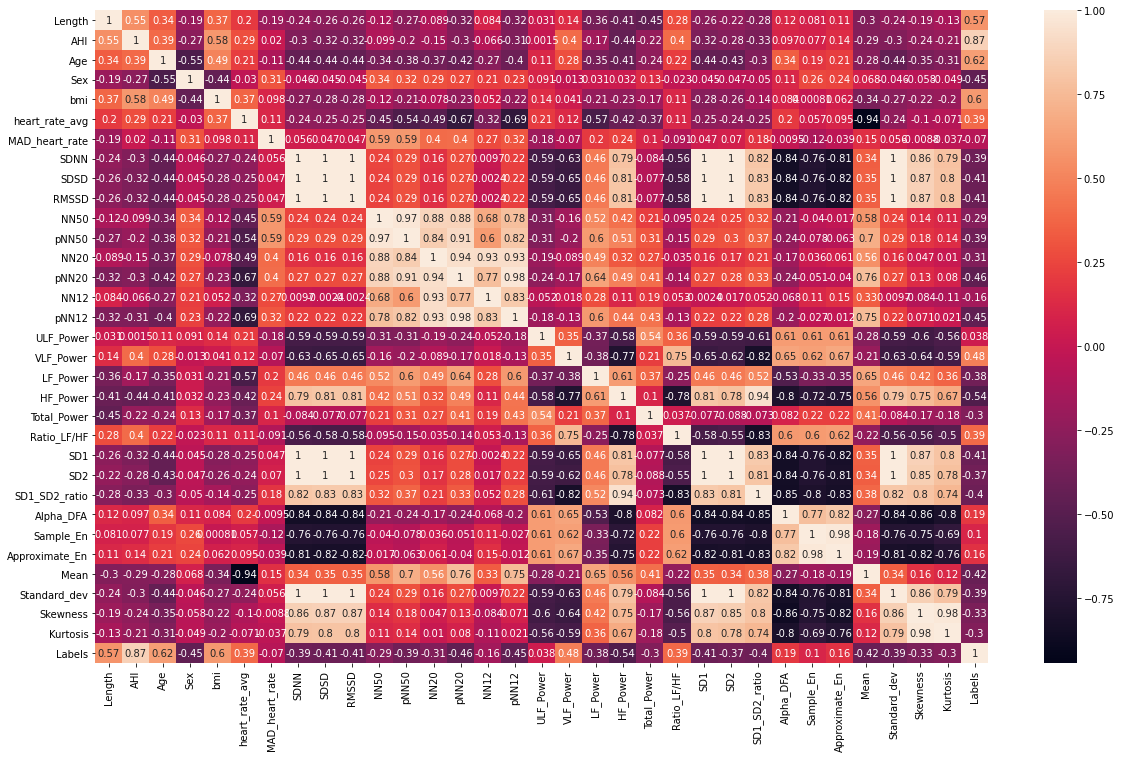

In [34]:
#checking the correlation using heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
df.drop(columns=['SDNN', 'RMSSD', 'SD1', 'SD2', 'Standard_dev'], inplace=True)
df

,Record,Length,AHI,Age,Sex,bmi,heart_rate_avg,MAD_heart_rate,SDSD,NN50,...,Total_Power,Ratio_LF/HF,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Skewness,Kurtosis,Labels
0,a01,490,69.60,51,0,33.306122,62.452731,8.629194,7.851999,5272,...,0.000032,3.353449,0.253909,0.785016,1.059829,1.248814,98.754418,0.044903,-0.153375,3
1,a02,529,69.50,38,0,37.037037,75.297989,11.711872,57.361801,3849,...,0.000021,0.611168,0.674052,0.793014,0.180764,0.543214,90.281490,4.791455,38.966698,3
2,a03,520,39.10,54,0,28.344671,67.343716,8.426380,8.617399,2224,...,0.000030,1.307037,0.290341,0.936691,0.417592,0.748218,91.498949,1.066024,3.219849,3
3,a04,493,77.40,52,0,40.429015,64.056484,6.771733,5.609250,1217,...,0.000040,2.215829,0.242449,0.834568,0.717745,0.889714,95.353402,-0.292567,1.856877,3
4,a05,455,41.00,58,0,25.180785,64.103843,4.578290,4.263427,1181,...,0.000038,1.933503,0.250624,0.934391,1.206626,1.344618,94.499635,0.124451,17.586790,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,93.50,29,1,29.860551,63.603951,10.724402,9.476538,6618,...,0.000030,2.486760,0.283443,0.775422,1.033398,1.299598,97.777700,-0.182561,2.762937,3
66,x32,539,71.80,29,1,29.860551,65.655975,10.163937,9.003307,6472,...,0.000019,1.792198,0.285826,0.882136,1.037138,1.301712,94.498051,-0.217948,-0.711709,3
67,x33,474,0.13,28,1,19.957284,72.984682,5.191501,7.776647,1018,...,0.000039,0.786508,0.490768,0.874394,1.008385,1.177741,83.087457,3.563564,65.070375,0
68,x34,476,0.38,30,1,19.841270,73.022049,5.217140,7.777747,1028,...,0.000036,0.794093,0.489696,0.874313,1.009234,1.179144,83.053867,3.516013,64.432115,0


In [36]:
#checking for missing values
df.isnull().sum()

Record            0
Length            0
AHI               0
Age               0
Sex               0
bmi               0
heart_rate_avg    0
MAD_heart_rate    0
SDSD              0
NN50              0
pNN50             0
NN20              0
pNN20             0
NN12              0
pNN12             0
ULF_Power         0
VLF_Power         0
LF_Power          0
HF_Power          0
Total_Power       0
Ratio_LF/HF       0
SD1_SD2_ratio     0
Alpha_DFA         0
Sample_En         0
Approximate_En    0
Mean              0
Skewness          0
Kurtosis          0
Labels            0
dtype: int64

In [37]:
df.drop(columns=['Record', 'Length'], inplace=True)

Feature 0: 64.011985
Feature 1: 24.681917
Feature 2: 9.929348
Feature 3: 42.462644
Feature 4: 4.188257
Feature 5: 1.215076
Feature 6: 6.548990
Feature 7: 3.065127
Feature 8: 3.970524
Feature 9: 3.285031
Feature 10: 5.011794
Feature 11: 1.958926
Feature 12: 4.390571
Feature 13: 1.528328
Feature 14: 5.685185
Feature 15: 4.376007
Feature 16: 6.669998
Feature 17: 0.580613
Feature 18: 3.402831
Feature 19: 3.830547
Feature 20: 3.059572
Feature 21: 1.565094
Feature 22: 2.080485
Feature 23: 3.858347
Feature 24: 5.149914
Feature 25: 4.557394


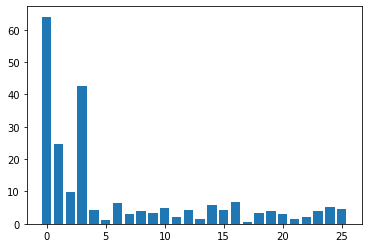

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X=df.iloc[:,:-1]      #independent variables(input variables)
y=df.iloc[:,-1]       #dependent variables(output variable) 

## applying train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

fs = SelectKBest(score_func=f_classif, k=10)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

#Importance scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [39]:
# fs.get_support(indices=True)
mask = fs.get_support(indices=True)
new_features = X.columns[mask]
new_features

Index(['AHI', 'Age', 'Sex', 'bmi', 'SDSD', 'pNN20', 'VLF_Power', 'HF_Power',
       'Skewness', 'Kurtosis'],
      dtype='object')

In [40]:
## creating a new dataframe with 15 features
df_new = df.loc[:,new_features]
df_new['Labels'] = y
df_new

,AHI,Age,Sex,bmi,SDSD,pNN20,VLF_Power,HF_Power,Skewness,Kurtosis,Labels
0,69.60,51,0,33.306122,7.851999,0.307011,0.000014,0.000002,0.044903,-0.153375,3
1,69.50,38,0,37.037037,57.361801,0.166766,0.000006,0.000009,4.791455,38.966698,3
2,39.10,54,0,28.344671,8.617399,0.195429,0.000019,0.000002,1.066024,3.219849,3
3,77.40,52,0,40.429015,5.609250,0.172556,0.000013,0.000002,-0.292567,1.856877,3
4,41.00,58,0,25.180785,4.263427,0.190465,0.000019,0.000003,0.124451,17.586790,3
...,...,...,...,...,...,...,...,...,...,...,...
65,93.50,29,1,29.860551,9.476538,0.293503,0.000019,0.000003,-0.182561,2.762937,3
66,71.80,29,1,29.860551,9.003307,0.295307,0.000009,0.000003,-0.217948,-0.711709,3
67,0.13,28,1,19.957284,7.776647,0.139293,0.000008,0.000006,3.563564,65.070375,0
68,0.38,30,1,19.841270,7.777747,0.139616,0.000009,0.000006,3.516013,64.432115,0


In [41]:
X

,AHI,Age,Sex,bmi,heart_rate_avg,MAD_heart_rate,SDSD,NN50,pNN50,NN20,...,HF_Power,Total_Power,Ratio_LF/HF,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Skewness,Kurtosis
0,69.60,51,0,33.306122,62.452731,8.629194,7.851999,5272,0.176103,9191,...,0.000002,0.000032,3.353449,0.253909,0.785016,1.059829,1.248814,98.754418,0.044903,-0.153375
1,69.50,38,0,37.037037,75.297989,11.711872,57.361801,3849,0.109219,5877,...,0.000009,0.000021,0.611168,0.674052,0.793014,0.180764,0.543214,90.281490,4.791455,38.966698
2,39.10,54,0,28.344671,67.343716,8.426380,8.617399,2224,0.064919,6695,...,0.000002,0.000030,1.307037,0.290341,0.936691,0.417592,0.748218,91.498949,1.066024,3.219849
3,77.40,52,0,40.429015,64.056484,6.771733,5.609250,1217,0.038954,5391,...,0.000002,0.000040,2.215829,0.242449,0.834568,0.717745,0.889714,95.353402,-0.292567,1.856877
4,41.00,58,0,25.180785,64.103843,4.578290,4.263427,1181,0.041040,5481,...,0.000003,0.000038,1.933503,0.250624,0.934391,1.206626,1.344618,94.499635,0.124451,17.586790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,93.50,29,1,29.860551,63.603951,10.724402,9.476538,6618,0.193679,10029,...,0.000003,0.000030,2.486760,0.283443,0.775422,1.033398,1.299598,97.777700,-0.182561,2.762937
66,71.80,29,1,29.860551,65.655975,10.163937,9.003307,6472,0.189700,10075,...,0.000003,0.000019,1.792198,0.285826,0.882136,1.037138,1.301712,94.498051,-0.217948,-0.711709
67,0.13,28,1,19.957284,72.984682,5.191501,7.776647,1018,0.029846,4751,...,0.000006,0.000039,0.786508,0.490768,0.874394,1.008385,1.177741,83.087457,3.563564,65.070375
68,0.38,30,1,19.841270,73.022049,5.217140,7.777747,1028,0.030014,4782,...,0.000006,0.000036,0.794093,0.489696,0.874313,1.009234,1.179144,83.053867,3.516013,64.432115


In [42]:
X_new=df_new.iloc[:,:-1]      #independent variables(input variables)
y_new=df_new.iloc[:,-1]       #dependent variables(output variable) 

In [43]:
X_new

,AHI,Age,Sex,bmi,SDSD,pNN20,VLF_Power,HF_Power,Skewness,Kurtosis
0,69.60,51,0,33.306122,7.851999,0.307011,0.000014,0.000002,0.044903,-0.153375
1,69.50,38,0,37.037037,57.361801,0.166766,0.000006,0.000009,4.791455,38.966698
2,39.10,54,0,28.344671,8.617399,0.195429,0.000019,0.000002,1.066024,3.219849
3,77.40,52,0,40.429015,5.609250,0.172556,0.000013,0.000002,-0.292567,1.856877
4,41.00,58,0,25.180785,4.263427,0.190465,0.000019,0.000003,0.124451,17.586790
...,...,...,...,...,...,...,...,...,...,...
65,93.50,29,1,29.860551,9.476538,0.293503,0.000019,0.000003,-0.182561,2.762937
66,71.80,29,1,29.860551,9.003307,0.295307,0.000009,0.000003,-0.217948,-0.711709
67,0.13,28,1,19.957284,7.776647,0.139293,0.000008,0.000006,3.563564,65.070375
68,0.38,30,1,19.841270,7.777747,0.139616,0.000009,0.000006,3.516013,64.432115


In [44]:
#lets standardise the inputs using standard scaler before training into the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X_new)
x=pd.DataFrame(x,columns=X_new.columns)

In [45]:
## applying train-test-split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=47, stratify=y)

In [46]:
#importing necessary libraries for models and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing boosting models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#evaluation metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold

In [47]:
#looping all the algorithms
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is: ',accuracy_score(y_test,predm))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,predm))
    print('Classification report:')
    print(classification_report(y_test,predm))
    print('******************************************************')
    print('\n')


Accuracy score of SVC() is:  0.9047619047619048
Confusion matrix:
[[7 0 0 0]
 [0 1 1 0]
 [1 0 2 0]
 [0 0 0 9]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         9

    accuracy                           0.90        21
   macro avg       0.89      0.79      0.82        21
weighted avg       0.91      0.90      0.90        21

******************************************************


Accuracy score of DecisionTreeClassifier() is:  0.9523809523809523
Confusion matrix:
[[7 0 0 0]
 [0 1 1 0]
 [0 0 3 0]
 [0 0 0 9]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.50      0.67         2
           2       0.75      1.00      0.86         3
    

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold

final_models = []
final_models.append(('SVC', SVC())) 
final_models.append(('DTC', DecisionTreeClassifier())) 
final_models.append(('KNN', KNeighborsClassifier())) 
final_models.append(('RFC', RandomForestClassifier())) 
final_models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in final_models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=47)    
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

SVC: 0.85 (0.090)
DTC: 1.00 (0.026)
KNN: 0.82 (0.116)
RFC: 0.95 (0.069)
GBC: 0.95 (0.077)


In [49]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('score:',dtc.score(X_train,y_train))
preddtc_class=dtc.predict(X_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,preddtc_class))
print(confusion_matrix(y_test,preddtc_class))
print(classification_report(y_test,preddtc_class))


score: 1.0


Accuracy Score: 1.0
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [50]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier(random_state=47)
grid={"criterion" : ['gini', 'entropy'],
      "splitter" : ['best', 'random'],
      "min_samples_split" : range(1,40),
      "min_samples_leaf" : range(1,20),
       "max_depth" : [0,1,2,3]}
dtc_cv=GridSearchCV(dtc,grid,cv=10)                                  
dtc_cv.fit(X_train,y_train)
dtc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [51]:
dtc=DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=47, min_samples_leaf=3, min_samples_split=2, splitter="best" )
dtc.fit(X_train,y_train)
print('score:',dtc.score(X_train,y_train))
preddtc_class=dtc.predict(X_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,preddtc_class))
print(confusion_matrix(y_test,preddtc_class))
print(classification_report(y_test,preddtc_class))


score: 1.0


Accuracy Score: 1.0
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

